## Border Crossing Entry Data

In [1]:
import pandas as pd                      #import dataframe and numpy for stats
import numpy as np

In [2]:
import matplotlib.pyplot as plt         #import graphs
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
import warnings as wrn                     #import warnings and ignore them
wrn.filterwarnings('ignore',category=FutureWarning)
wrn.filterwarnings('ignore',category=UserWarning)
wrn.filterwarnings('ignore',category=DeprecationWarning)

In [4]:
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

In [5]:
df=pd.read_csv('Border_Crossing_Entry_Data.csv')

In [6]:
#check few rows
df.head()

,Port Name,State,Port Code,Border,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [7]:
# check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 7 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
dtypes: int64(2), object(5)
memory usage: 18.5+ MB


In [8]:
#check nulls
df.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Measure      0
Value        0
Location     0
dtype: int64

In [19]:
#columns
df.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Measure', 'Value',
       'Location'],
      dtype='object')

In [24]:
# dtypes for the columns
df.dtypes
#we have objects as columns dtypes thus we need to clean them

Port Name    object
State        object
Port Code     int64
Border       object
Measure      object
Value         int64
Location     object
dtype: object

In [31]:
#columns wheere the dtype is object
object_cols = df.columns[df.dtypes == object]

In [32]:
#check the head of the columns
df[object_cols].head(10)

,Port Name,State,Border,Measure,Location
0,Calexico East,California,US-Mexico Border,Trucks,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,US-Canada Border,Rail Containers Full,POINT (-67.94271 47.16207)
2,Otay Mesa,California,US-Mexico Border,Trucks,POINT (-117.05333 32.57333)
3,Nogales,Arizona,US-Mexico Border,Trains,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,US-Canada Border,Personal Vehicle Passengers,POINT (-73.44253 44.990010000000005)
5,Madawaska,Maine,US-Canada Border,Trucks,POINT (-68.3271 47.35446)
6,Pembina,North Dakota,US-Canada Border,Bus Passengers,POINT (-97.24333 48.96639)
7,Progreso,Texas,US-Mexico Border,Truck Containers Empty,POINT (-97.94889 26.061670000000003)
8,Portal,North Dakota,US-Canada Border,Rail Containers Empty,POINT (-102.54917 48.99583)
9,Champlain-Rouses Point,New York,US-Canada Border,Trucks,POINT (-73.44694 44.98639)


In [9]:
#check the uniques values in the border column
print('Total Borders are in data are : ' + df['Border'].unique())
#we onnly have two of them

['Total Borders are in data are : US-Mexico Border'
 'Total Borders are in data are : US-Canada Border']


In [14]:
#check shape
df.shape

(346733, 7)

In [13]:
#check duplicates
df.duplicated().sum()

169007

In [16]:
# remove duplicates
df.drop_duplicates(inplace = True)

In [17]:
#check new shape
df.shape

(177726, 7)

In [25]:
#check types of vehicles crossing the borders
print('Vehicle Typwe crossing the border ->'+ df['Measure'].unique())

['Vehicle Typwe crossing the border ->Trucks'
 'Vehicle Typwe crossing the border ->Rail Containers Full'
 'Vehicle Typwe crossing the border ->Trains'
 'Vehicle Typwe crossing the border ->Personal Vehicle Passengers'
 'Vehicle Typwe crossing the border ->Bus Passengers'
 'Vehicle Typwe crossing the border ->Truck Containers Empty'
 'Vehicle Typwe crossing the border ->Rail Containers Empty'
 'Vehicle Typwe crossing the border ->Personal Vehicles'
 'Vehicle Typwe crossing the border ->Buses'
 'Vehicle Typwe crossing the border ->Truck Containers Full'
 'Vehicle Typwe crossing the border ->Pedestrians'
 'Vehicle Typwe crossing the border ->Train Passengers']


In [26]:
#sum of cars types crossing the border
df['Measure'].nunique()

12

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

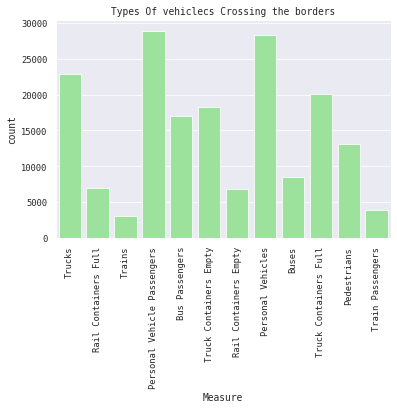

In [42]:
#we will plot a count plot for the typ of cars crossing the border
sns.countplot(x='Measure',data=df,color="lightgreen")
sns.set(context="paper", font="monospace")
plt.title("Types Of vehiclecs Crossing the borders")
plt.xticks(rotation=90)

## Observation
 From the above wwe have saw that Personal Vehicles were the most recorded to cross the border.
 This maybe because most people use private cars as means of trasport rather than psv
 
 Trains had  the lowest records as Trains are not common means of transport in Us

(array([0, 1]), <a list of 2 Text xticklabel objects>)

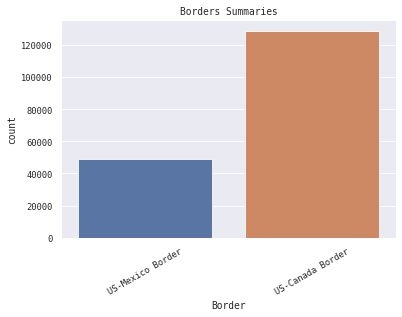

In [36]:

#we will plot a count plot for the two borders
sns.countplot(x='Border',data=df)
plt.title("Borders Summaries")
sns.set(context="paper", font="monospace")
plt.xticks(rotation=30)

## Observsation
  From The Results of Border Summaries , We see musch of the vehicles uses US_Canada Border to cross.

In [45]:
print(' States with the borders : ' + df['State'].unique())
print(f"Totals to {df['State'].nunique()}")

[' States with the borders : California'
 ' States with the borders : Maine' ' States with the borders : Arizona'
 ' States with the borders : New York'
 ' States with the borders : North Dakota'
 ' States with the borders : Texas' ' States with the borders : Montana'
 ' States with the borders : Minnesota'
 ' States with the borders : Vermont'
 ' States with the borders : Washington'
 ' States with the borders : Idaho' ' States with the borders : Michigan'
 ' States with the borders : New Mexico'
 ' States with the borders : Alaska' ' States with the borders : Ohio']
Totals to 15


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

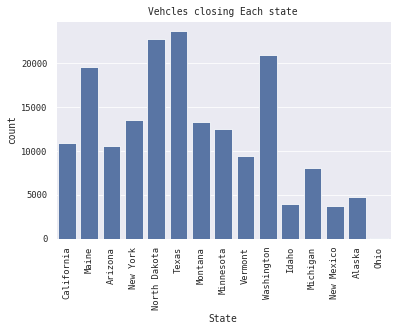

In [46]:
#check total vehicles passing throue each state
sns.countplot(x='State',data=df,color="b")
plt.title("Vehcles closing Each state")
sns.set(context="paper", font="monospace")
plt.xticks(rotation=90)

## Observation
  Mosts vehicles pass through Texas while crossing the border
  
  Mexico Experiences the least vehicles maybe as you know in reality because 
   of restrictions from us government as its is regarded as drug dealer state

In [69]:
# print(' Ports used : ' + df['Port Name'].unique())
print(f"Totals to {df['Port Name'].nunique()}")

Totals to 116


In [59]:
#since the data is big lets deals with strings and categorical datsa first
#we will cat encode them
df[object_cols] = df[object_cols].astype('category')

In [62]:
#encode them
for each in object_cols:
    df[each] = df[each].cat.codes

In [67]:
#check new data types
df.dtypes

Port Name     int8
State         int8
Port Code    int64
Border        int8
Measure       int8
Value        int64
Location     int16
dtype: object

In [68]:
df.head()

,Port Name,State,Port Code,Border,Measure,Value,Location
0,18,2,2507,1,11,34447,74
1,107,4,108,0,6,428,141
2,72,2,2506,1,11,81217,87
3,64,1,2604,1,8,62,53
4,105,9,715,0,3,16377,161


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 <a list of 116 Text xticklabel objects>)

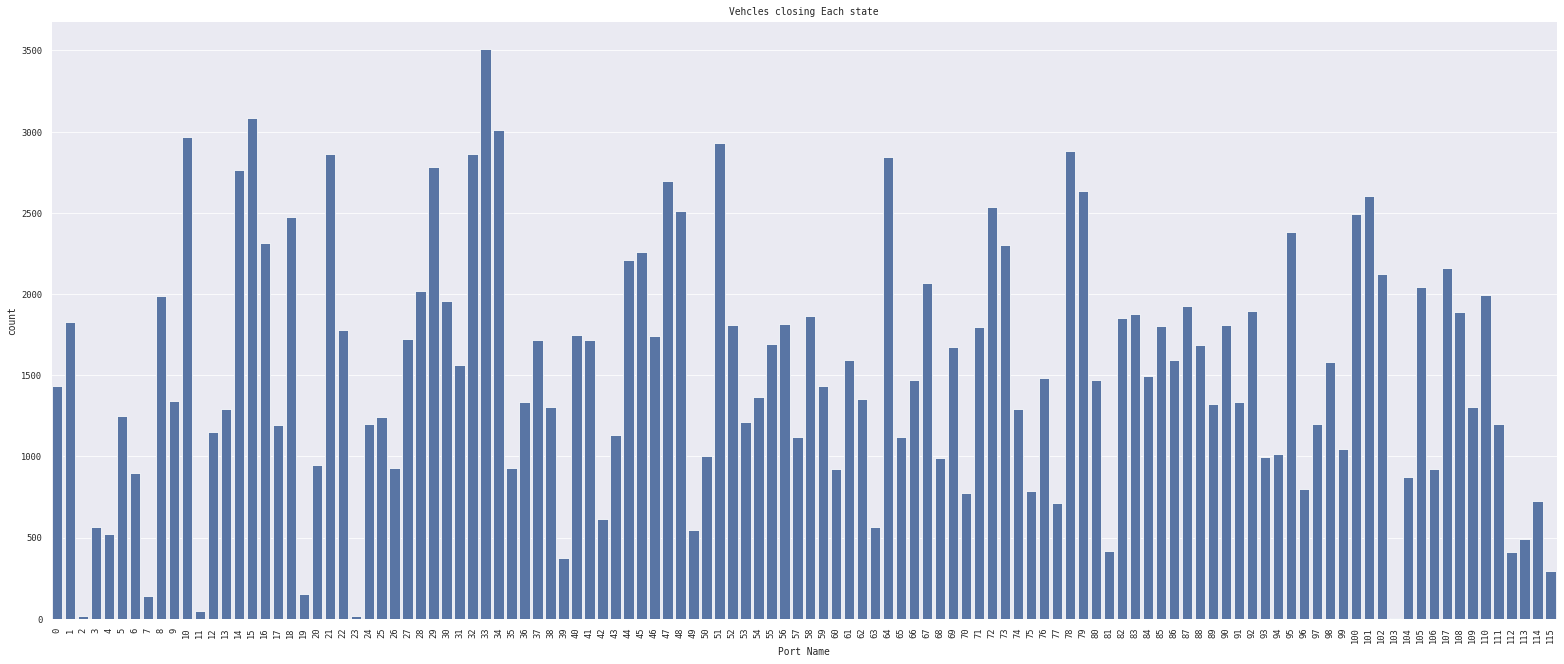

In [73]:
#check the distribution of port names
#check total vehicles passing throue each state
plt.figure(figsize = (27,11))
sns.countplot(df['Port Name'],color="b")
plt.title("Vehcles closing Each state")
sns.set(context="paper", font="monospace")
plt.xticks(rotation=90)